In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/candy-data.csv")

In [3]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


### Candies with highest win percent

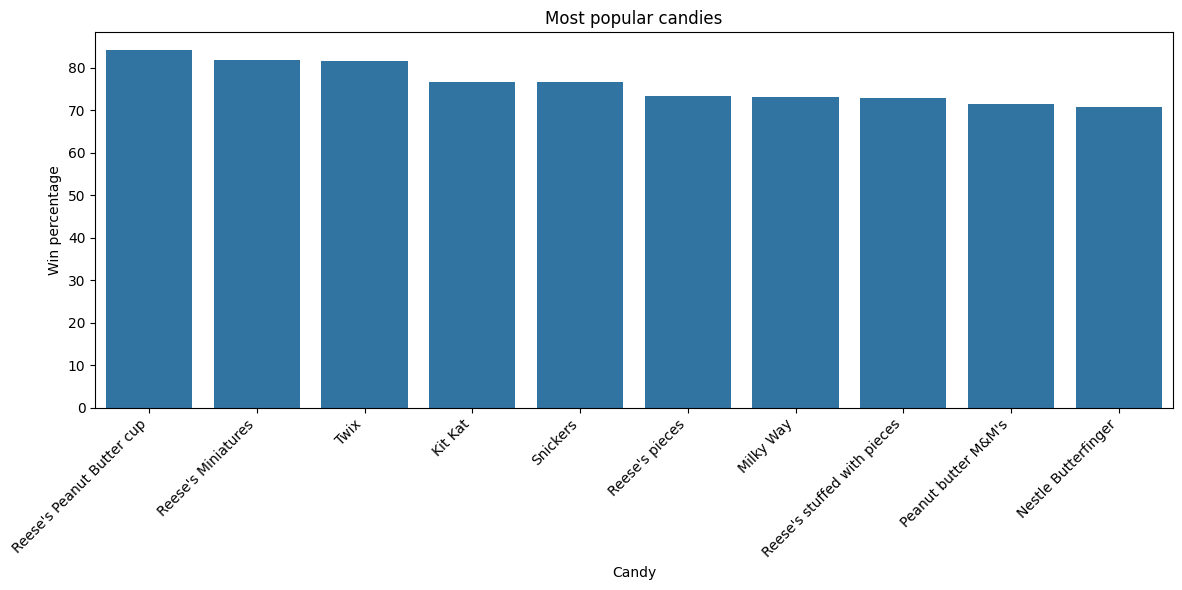

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df.nlargest(10, "winpercent"),
    x="competitorname",
    y="winpercent",
)
plt.xlabel("Candy")
plt.ylabel("Win percentage")
plt.title("Most popular candies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Distribution of winpercent

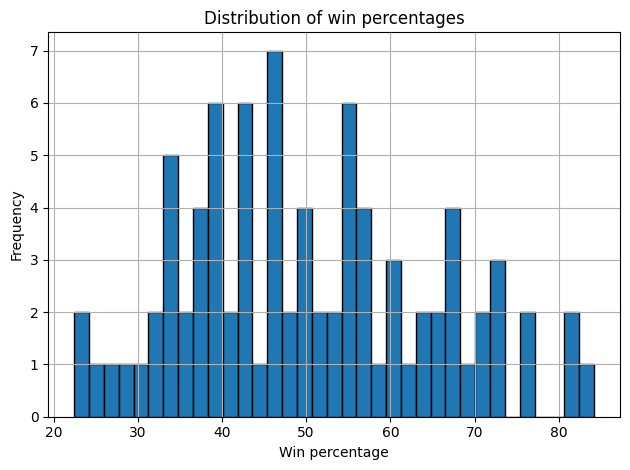

In [13]:
df["winpercent"].hist(bins=35, edgecolor="black")
plt.xlabel("Win percentage")
plt.ylabel("Frequency")
plt.title("Distribution of win percentages")
plt.tight_layout()
plt.show()

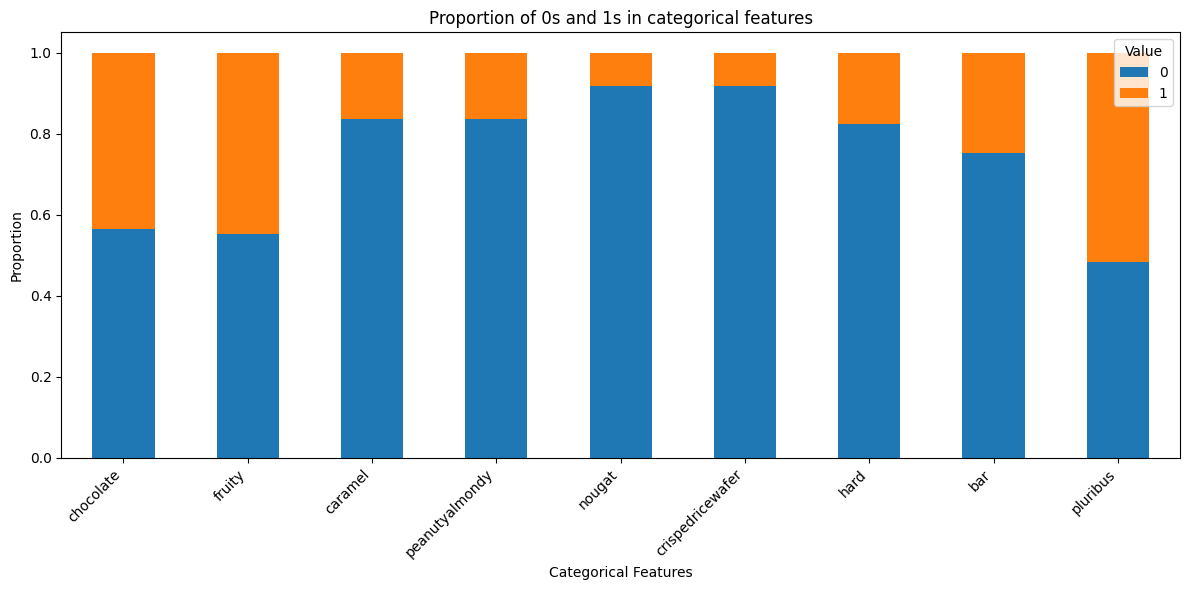

In [71]:
# categorical features
cat_features = df.drop(
    columns=["competitorname", "winpercent", "pricepercent", "sugarpercent"],
)
proportions = cat_features.mean()
prop_plot_data = pd.DataFrame({"0": 1 - proportions, "1": proportions})
plt.figure(figsize=(12, 6))
prop_plot_data.plot(kind="bar", stacked=True, ax=plt.gca())
plt.xlabel("Categorical Features")
plt.ylabel("Proportion")
plt.title("Proportion of 0s and 1s in categorical features")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Value", labels=["0", "1"])
plt.tight_layout()
plt.show()

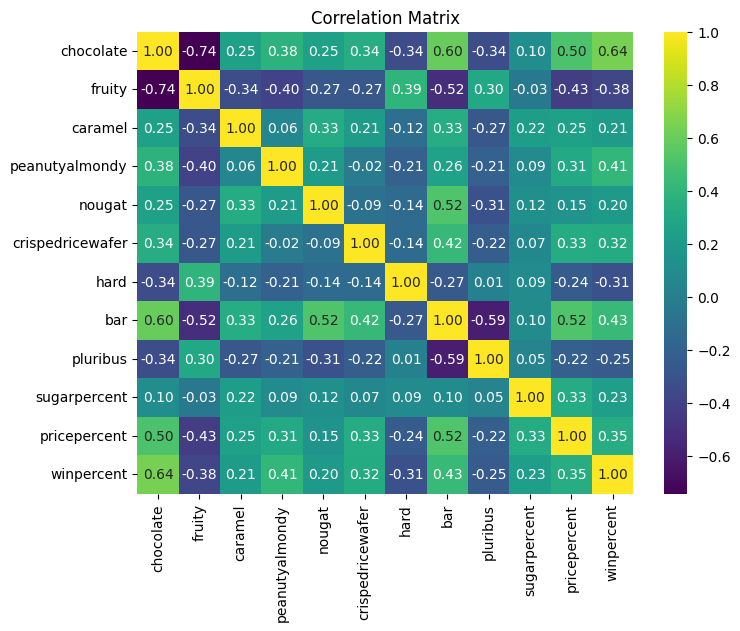

In [29]:
corr_mat = df.drop("competitorname", axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_mat,
    annot=True,
    fmt=".2f",
    cmap="viridis",
)
plt.title("Correlation Matrix")
plt.show()

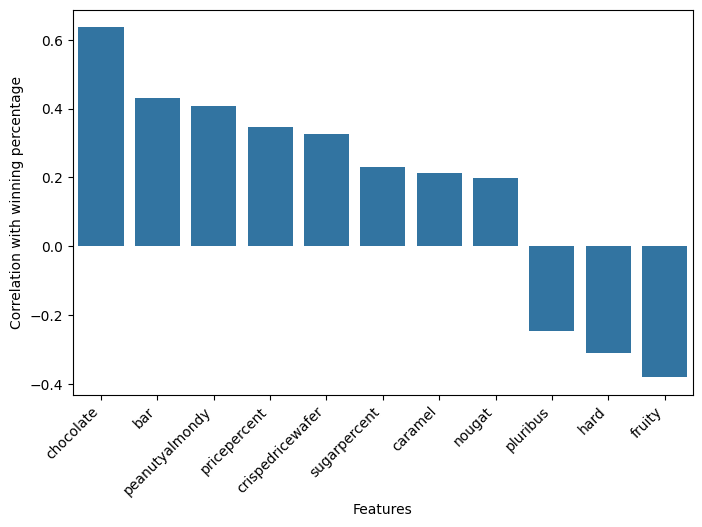

In [62]:
corr_with_winpercent = (
    corr_mat["winpercent"].drop("winpercent").sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_winpercent.index, y=corr_with_winpercent.values)
plt.xlabel("Features")
plt.ylabel("Correlation with winning percentage")
plt.xticks(rotation=45, ha="right")
plt.show()